In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline


In [2]:
# fake data
d = np.array([0, 5, 10, 20, 22, 23, 25, 26, 28, 29, 30])
v = 100-100*np.arange(len(d))/(len(d)-1)
# smooth curve
d_smooth = np.linspace(d.min(), d.max(), 100)
spl = make_interp_spline(d, v, k=3)
spl_ = make_interp_spline(v[::-1],d[::-1], k=3)
v_smooth = spl(d_smooth)


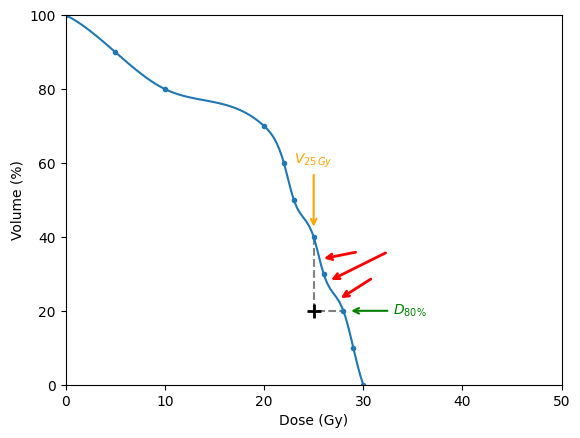

In [3]:
# constraint ticks
plt.plot([25, 25, d[8]], [40, 20, 20], color='grey', linestyle='--')
plt.plot(25, 20, '+', color='k', ms=10, markeredgewidth=2)
# constraint "pushing" arrows
plt.annotate('', xy=(25.75, 34), xytext=(29.5, 36), arrowprops=dict(arrowstyle="->", color='red', lw=2))
plt.annotate('', xy=(26.5, 28), xytext=(32.5, 36), arrowprops=dict(arrowstyle="->", color='red', lw=2))
plt.annotate('', xy=(27.5, 23), xytext=(31, 29), arrowprops=dict(arrowstyle="->", color='red', lw=2))
plt.annotate("$V_{25\,Gy}$", xy=(25, 42), xytext=(25, 60), color='orange', weight='heavy', horizontalalignment='center',\
             arrowprops=dict(arrowstyle="->", color='orange', lw=1.5))
plt.annotate("$D_{80\%}$", xy=(d[8]+0.5, 20), xytext=(d[8]+5, 20), color='green', weight='heavy', verticalalignment='center',\
             arrowprops=dict(arrowstyle="->", color='green', lw=1.5))
# DVH + DVH points
c = plt.plot(d_smooth, v_smooth)
plt.plot(d, v, ".", color=c[0].get_color())

# axes labels
plt.xlabel('Dose (Gy)')
plt.ylabel('Volume (%)')
# axes limits
plt.ylim(0, 100)
plt.xlim(0, 50)

plt.savefig('constraint_plot.pdf', bbox_inches='tight')
plt.show()

In [4]:
# fake data 2
d2 = np.array([0, 5, 10, 15, 18, 19, 20, 23, 25, 26, 27])
v2 = 100-100*np.arange(len(d))/(len(d)-1)
# smooth curve
d2_smooth = np.linspace(d2.min(), d2.max(), 100)
spl0 = make_interp_spline(d2, v2, k=3)
spl0_ = make_interp_spline(v2[::-1],d2[::-1], k=3)
v2_smooth = spl0(d2_smooth)


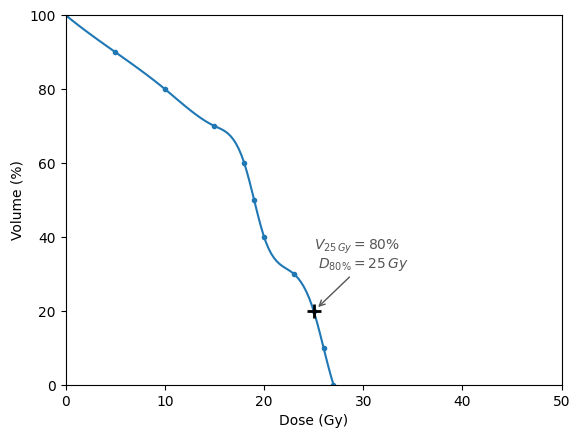

In [5]:
# DVH + DVH points
c = plt.plot(d2_smooth, v2_smooth)
plt.plot(d2, v2, ".", color=c[0].get_color())
# constraint ticks
plt.plot(25, 20, '+', color='k', ms=10, markeredgewidth=2)
plt.annotate("$D_{80\%} = 25\,Gy$", xy=(25.25, 20.5), xytext=(30, 35), color='#555', verticalalignment='top', horizontalalignment='center',\
             arrowprops=dict(arrowstyle="->", color='#555', lw=1))
plt.text(29.42, 35, "$V_{25\,Gy} = 80\%$", color='#555', verticalalignment='bottom', horizontalalignment='center')
# plt.annotate("$D_{80\%} = 25\,Gy$", xy=(25, 20), xytext=(20, 10), color='#555', verticalalignment='bottom', horizontalalignment='center',\
#              arrowprops=dict(arrowstyle="->", color='#555', lw=1))
# plt.text(19.42, 10, "$V_{25\,Gy} = 80\%$", color='#555', verticalalignment='top', horizontalalignment='center')
# plt.annotate("$V_{25\,Gy} = 80\%$", xy=(25, 22), xytext=(25, 40), color='orange', weight='heavy', horizontalalignment='center',\
#              arrowprops=dict(arrowstyle="->", color='orange', lw=1.5))
# plt.annotate("$D_{80\%} = 25\,Gy$", xy=(d2[8]+0.5, 20), xytext=(d2[8]+5, 20), color='green', weight='heavy', verticalalignment='center',\
#              arrowprops=dict(arrowstyle="->", color='green', lw=1.5))
# axes labels
plt.xlabel('Dose (Gy)')
plt.ylabel('Volume (%)')
# axes limits
plt.ylim(0, 100)
plt.xlim(0, 50)

plt.savefig('constraint_plot_met.pdf', bbox_inches='tight')
plt.show()

-----

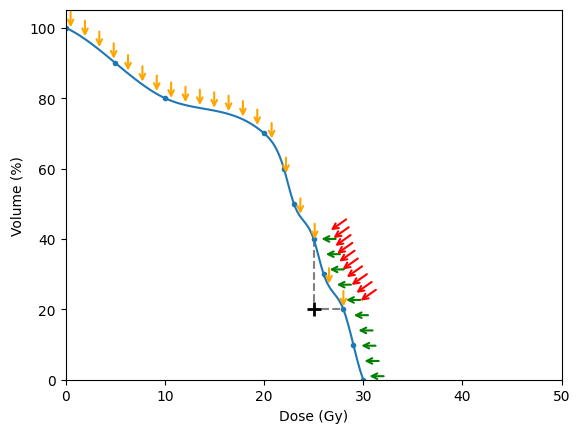

In [6]:
# constraint ticks
plt.plot([25, 25, d[8]], [40, 20, 20], color='grey', linestyle='--')
plt.plot(25, 20, '+', color='k', ms=10, markeredgewidth=2)
# constraint "pushing" arrows
for x in np.linspace(0.5, d[8], 20):
    plt.annotate("", xy=(x, spl(x)), xytext=(x, spl(x)+6), arrowprops=dict(arrowstyle="->", color='orange', lw=1.5))
for y in np.linspace(1, 40, 10):
    plt.annotate("", xy=(spl_(y)+0.5, y), xytext=(spl_(y)+2.5, y), arrowprops=dict(arrowstyle="->", color='green', lw=1.5))
for y in np.linspace(20, 40, 10):
    plt.annotate("", xy=(spl_(y)+1.5, y+2), xytext=(spl_(y)+3.5, y+6), arrowprops=dict(arrowstyle="->", color='red', lw=1.5))
# DVH + DVH points
c = plt.plot(d_smooth, v_smooth)
plt.plot(d, v, ".", color=c[0].get_color())

# axes labels
plt.xlabel('Dose (Gy)')
plt.ylabel('Volume (%)')
# axes limits
plt.ylim(0, 105)
plt.xlim(0, 50)

plt.savefig('constraint_penalisation_plot.pdf', bbox_inches='tight')
plt.show()